# Python ile Yapay Sinir Aglarina Giris

> Bu calisma buyuk olcude, [inzva'da](https://inzva.com/open-source-application-form?utm_source=Open+Source+Challenge+Day&utm_campaign=4d2f44397c-EMAIL_CAMPAIGN_2018_01_02&utm_medium=email&utm_term=0_9a76f360b0-4d2f44397c-41568991) duzenlenen Open Source Challenge Day Vol.5 acik kaynak etkinligi kapsaminda Uzay Cetin tarafindan hazirlanmistir. Ayrica bu calisma Sariyer akademide duzenlenen [Liseler için Yapay Zekaya Giriş Eğitimi](https://uzay00.github.io/kahve/giris.html)'nde kullanilacaktir.


__Yapilacaklar__ 

* Toy data uretilecek
* sklearn kutuphanesi yardimi ile siniflandirma yapilacak
* sklearn kutuphanesinden elde edilen agirlik ve bias degerleri 
     
     + sifirdan yazilan ileri besleme aginda kullanilarak tekrar siniflandirma yapilacak
     + Daha sonrasinda geriyayilim algoritmasi sifirdan yazilarak, kendi yapay sinir agimizi yazacagiz.
* sklearn kutuphanesindeki yazi veri kumesi uzerinde kendi yapay sinir agimizla siniflandirma yapilacaktir.

__Yararlanilan Kaynaklar__
* [veridefteri](http://www.veridefteri.com/2017/11/23/scikit-learn-ile-veri-analitigine-giris/)
* [Michael Nielson, Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com)


### Toy data

$x_0$ ve $x_1$ olmak uzere iki girdi degeri ve bir cikti $y$ degeri olan veriyi uretecegiz. $x_0$ ve $x_1$ degerleri 0 ile 100 arasinda rastgele tamsayi degerler aliyor, $y$ ise $x_0>x_1$ ise $1$ degilse $0$ degeri almaktadir.


In [1]:
#numpy paketini yüklüyoruz.
import numpy as np
# GIRDI: 1 ile 100 arasinda 1000 adet x1 ve x2
X = np.random.randint(100, size=(1000,2))
# CIKTI: ilk kolon ikinci kolondan buyukse, y=1
y = (X[:,0] > X[:,1]) * 1

print("GIRDI:\n", X[1:6,])
print("CIKTI:\n", y[1:6,])

GIRDI:
 [[ 8 89]
 [57 40]
 [68 92]
 [67 20]
 [57 60]]
CIKTI:
 [0 1 0 1 0]


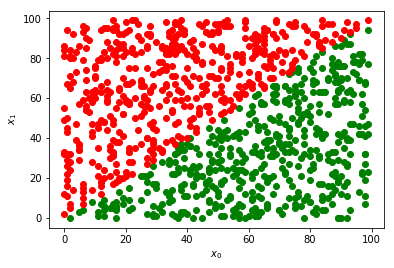

In [2]:
import matplotlib.pyplot as plt
pos = (y == 1)
plt.plot(X[pos,0], X[pos,1], "go")
plt.plot(X[~pos,0], X[~pos,1], "ro")
plt.xlabel("$x_0$");plt.ylabel("$x_1$")
plt.show()

### Sklearn kutuphanesi yardimi ile siniflandirma

In [3]:
#################################################
# Datayi train ve test olark ayir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("ogrenme kumesinin uzunlugu: ", len(X_train))
print("test kumesinin uzunlugu: ", len(X_test))

#################################################
# Datayi normalize et 
#.      Standardize features by removing the mean and scaling to unit variance
#.      Centering and scaling happen independently on each feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#################################################
# yapay ogrenme
# Agin katmanlari 2 (girdi), 3(ara) , 1(cikti) 
    # SADECE ara katman degerlerini MLPClassifier'a veriyoruz
    # sigmoid icin activation= 'logistic' seciyoruz
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes=(3),max_iter=500)
mlp.fit(X_train,y_train)


#################################################
# tahminde bulun
predictions = mlp.predict(X_test)
# sonuclara bak
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

ogrenme kumesinin uzunlugu:  750
test kumesinin uzunlugu:  250


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[120   1]
 [  1 128]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Sifirdan Ileri Besleme Agi

sklearn kutuphanesinden elde edilen agirlik (mlp.coefs_) ve bias (mlp.intercepts_) degerlerini kendi ileri besleme agimizda kullanacagiz.

In [4]:
# W, b icinde sklearn kutuphanesinden gelen agirlik ve bias degerlerini tutacagiz
W, b = [], []
for c, i in zip(mlp.coefs_, mlp.intercepts_):
    W.append(c.T)
    b.append(i.reshape((len(i), 1)))
    
# Agirliklar (girdi-ara) 3x2 matris
# Agirliklar (ara-cikti) 1x3 matris
print("agirlik :")
for w in W:
    print(w, "\n")
    
print("bias :")
for i in b:
    print(i, "\n")

agirlik :
[[-1.88141318  1.71888803]
 [ 1.49093284 -1.22026666]
 [ 1.7194988  -2.08641553]] 

[[-2.30193491  1.1164206   2.13425249]] 

bias :
[[ 0.1702897 ]
 [-0.18059533]
 [-0.17099307]] 

[[-0.31920663]] 



Ornek bir veride ileri besleme agimizin ciktilari sklearn ciktilari ile karsilastiralim. Ama oncelikle ornek verimizin de normalize edilmesi gerekiyor.

In [5]:
# help(StandardScaler)
ornek_veri =  [  [9, 1],
                 [8,1],
                 [6,5],
                 [5,6],
                 [1,9]]
ornek_veri = scaler.transform(ornek_veri)
print(ornek_veri)

tahmin = mlp.predict(ornek_veri)
print("Tahmin: \n", tahmin)

[[-1.46634628 -1.72167202]
 [-1.50243    -1.72167202]
 [-1.57459745 -1.58067849]
 [-1.61068117 -1.54543011]
 [-1.75501606 -1.43968496]]
Tahmin: 
 [1 1 0 0 0]


### Ileri Besleme Agimizi yazalim

In [6]:
#### Yardimci Fonksiyonlar
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
def sigmoid_turevi(z):
    return sigmoid(z)*(1-sigmoid(z))

def ileribesleme(a, agirlik, bias, goster = False):
    """Katman katman yeni a degerleri hesaplaniyor
    Girdinin transpozu (satirlar ozellik, sutunlar gozlem) a olarak verilmeli. 
    """
    for w, b in zip(agirlik, bias):
        if goster:
            print("w:\n", w, "\n")
            print("a:\n", a, "\n")
            print("np.dot(w, a):\n", np.dot(w, a), "\n")
            print("b:\n", b, "\n")
            print("a = sigmoid(np.dot(w, a)+b):\n", sigmoid(np.dot(w, a)+b), "\n\n",
                  "**"*20,"\n\n")
        z = np.dot(w, a)+b
        a = sigmoid(z)   
    return a

In [7]:
ileribesleme(ornek_veri.T, W, b, goster = True)

w:
 [[-1.88141318  1.71888803]
 [ 1.49093284 -1.22026666]
 [ 1.7194988  -2.08641553]] 

a:
 [[-1.46634628 -1.50243    -1.57459745 -1.61068117 -1.75501606]
 [-1.72167202 -1.72167202 -1.58067849 -1.54543011 -1.43968496]] 

np.dot(w, a):
 [[-0.20055821 -0.13266982  0.24545906  0.37393548  0.82725312]
 [-0.08532486 -0.13912327 -0.41876979 -0.51558063 -0.85981154]
 [ 1.07074256  1.00869665  0.59043372  0.45484502 -0.01396697]] 

b:
 [[ 0.1702897 ]
 [-0.18059533]
 [-0.17099307]] 

a = sigmoid(np.dot(w, a)+b):
 [[ 0.49243345  0.50940386  0.60246552  0.63279475  0.73057519]
 [ 0.43390896  0.42074433  0.35448896  0.33266061  0.2610715 ]
 [ 0.71089802  0.69798134  0.60334939  0.57049033  0.45389136]] 

 **************************************** 


w:
 [[-2.30193491  1.1164206   2.13425249]] 

a:
 [[ 0.49243345  0.50940386  0.60246552  0.63279475  0.73057519]
 [ 0.43390896  0.42074433  0.35448896  0.33266061  0.2610715 ]
 [ 0.71089802  0.69798134  0.60334939  0.57049033  0.45389136]] 

np.dot(w, a

array([[ 0.63388136,  0.61480961,  0.49435416,  0.45341069,  0.32283824]])

In [8]:
## Ciktimiz
(ileribesleme(ornek_veri.T, W, b) > 0.5) * 1

array([[1, 1, 0, 0, 0]])

In [9]:
## sklearn ciktisi ile ayni sonucu urettik mi?
tahmin == (ileribesleme(ornek_veri.T, W, b) > 0.5) * 1

array([[ True,  True,  True,  True,  True]], dtype=bool)

## Sifirdan Geri Yayilim Algoritmasi

## Rakamlar veri kümesi uzerinde calisma

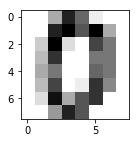

Etiket: 0


In [11]:
#Rakamlar veri kümesini yüklüyoruz.
from sklearn.datasets import load_digits
#Veri kümesini etiket değerleriyle birlikte yükleyelim.
X,y = load_digits(return_X_y=True)

rakam1 = X[0]
rakam1 = np.reshape(rakam1, (8,8))

plt.figure(figsize= (2,2))
plt.imshow(rakam1, cmap="gray_r")
plt.show()
etiket1 = y[0]
print('Etiket: ' + str(etiket1))

In [12]:
# Bu veri kumesinden sadece 0 ve 1 rakamlarini secelim
X= X[y < 2]
y= y[y < 2]

print(X.shape)
print(y.shape)

(360, 64)
(360,)


In [13]:
#################################################
# Datayi train ve test olark ayir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("ogrenme kumesinin uzunlugu: ", len(X_train))
print("test kumesinin uzunlugu: ", len(X_test))

#################################################
# Datayi normalize et 
#.      Standardize features by removing the mean and scaling to unit variance
#.      Centering and scaling happen independently on each feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#################################################
# yapay ogrenme
# Agin katmanlari 2 (girdi), 3(ara) , 1(cikti) 
    # SADECE ara katman degerlerini MLPClassifier'a veriyoruz
    # sigmoid icin activation= 'logistic' seciyoruz
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation= 'logistic', hidden_layer_sizes=(3),max_iter=500)
mlp.fit(X_train,y_train)


#################################################
# tahminde bulun
predictions = mlp.predict(X_test)
# sonuclara bak
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

ogrenme kumesinin uzunlugu:  270
test kumesinin uzunlugu:  90
[[41  0]
 [ 0 49]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
